In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Data set 
dataset = [1,2,2,2,3,3,4,5,5,5,6,6,6,6,7,8,8,9,27]

(array([6., 8., 3., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

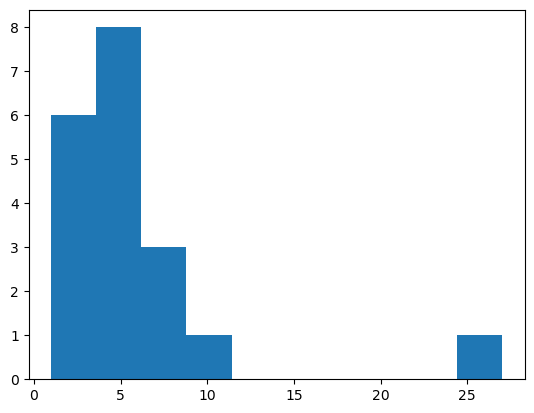

In [5]:
plt.hist(dataset)

In [12]:
# Z-score
outliers=[]
def detect_outliers(data):
    threshold = 3 #3rd standard deviation 
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [13]:
detect_outliers(dataset)

[27]

In [ ]:
# IQR
1. Sort the data
2. Calculate Q1(25%) and Q2 (75%)
3. IQR (Q3 - Q1)
4. Find the Lower Fence => Q1-1.5(IQR)
5. Find the Higher Fence => Q3 + 1.5 (IQR)

In [3]:
#Sort
dataset=sorted(dataset)

In [17]:
dataset

[1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 7, 8, 8, 9, 27]

In [4]:
q1,q3 = np.percentile(dataset,[25,75])

In [19]:
print(q1,q3)

3.0 6.5


In [5]:
iqr = q3 - q1 

In [21]:
print(iqr)

3.5


In [6]:
#Find lower fence and upper fence

lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print(lower_fence,upper_fence)

-2.25 11.75


In [7]:
outliers = []
def detect_outliers(l,u):
    for i in dataset:
        if i > u or i < l:
            outliers.append(i)
    return outliers

In [9]:
detect_outliers(lower_fence,upper_fence)

[27]

In [12]:
import seaborn as sns

/Users/kamlishgoswami/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

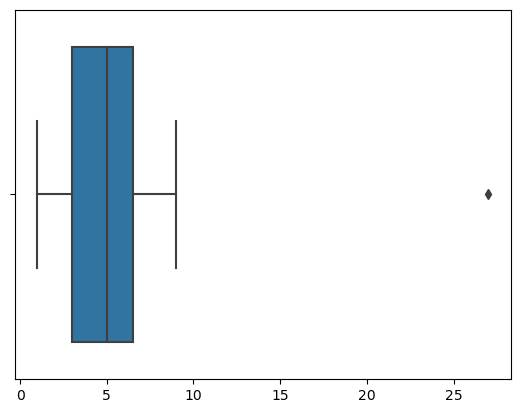

In [13]:
sns.boxplot(dataset)